# Stock Price Anaylsis

Import data using yfinance rather than manually downloading the files.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  3 of 3 completed


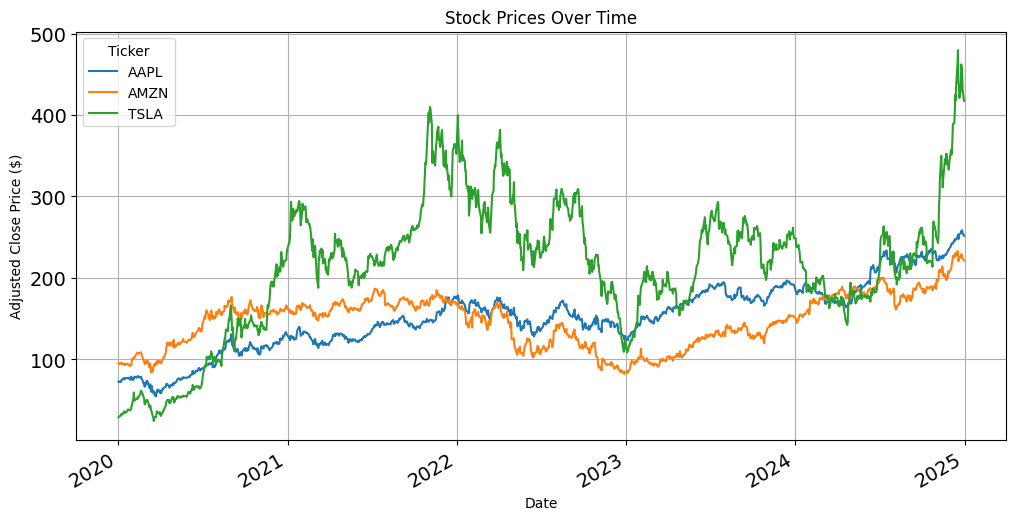

In [2]:
# Download/import data
data = yf.download(['TSLA', 'AAPL', 'AMZN'], start="2020-01-01", end="2024-12-31", auto_adjust=False)['Adj Close']
#print(data.columns)
data.plot(figsize=(12,6), fontsize=(14))
plt.title("Stock Prices Over Time")
plt.ylabel("Adjusted Close Price ($)")
plt.grid(True)
plt.show()

*auto_adjust=True*  

This automatically adjusts historical stock prices for splits and dividends. This ensures that the price data reflects the true performance of the stock over time.

In this session I went through yfiance, exploring different stock, difference between tickers and download function in yfinance. plotting the stocks. I reviewed the historical data for apple, amazon and tesla, in yfinance, there are usually 6 columns for each company's stock they are: High, Low, Open, Close, adj close and volume . I will be working with 'adj close' in this project. The Adjusted Close Price is the stock’s price at the end of each trading day, adjusted for things like: Stock splits, Dividends, Corporate actions.

The Adjusted Close price for each stock shows the adjusted value of that company's share at the end of each day. By plotting these values over time, we can see how the stock is performing. If the price increases consistently, it suggests the company is doing well. If the price falls or is unstable, it might indicate poor performance or higher risk.

In [3]:
data.head()

Ticker,AAPL,AMZN,TSLA
Date,,,
2020-01-02,72.620827,94.900497,28.684000
2020-01-03,71.914810,93.748497,29.534000
2020-01-06,72.487839,95.143997,30.102667
2020-01-07,72.146942,95.343002,31.270666
2020-01-08,73.307510,94.598503,32.809334


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   AMZN    1257 non-null   float64
 2   TSLA    1257 non-null   float64
dtypes: float64(3)
memory usage: 39.3 KB


# Daily Return
This is calculated using daily percentage change. which is the difference between 2 consecutive day's adjust close divided by the previous day's adjust close, hence *(today-previous)/previous* or *(today/yesterday)-1*
We use .pct_change() to compute this for each stock.

The daily return (or daily percentage change) is calculated by comparing the stock’s adjusted close price to the previous day’s value. It tells us how much the stock went up or down on a given day.

Return measures how much the stock's price changed from one day to the next.

In [5]:
data['dpc_AAPL']=data['AAPL'].pct_change()
data['dpc_AMZN']=data['AMZN'].pct_change()
data['dpc_TSLA']=data['TSLA'].pct_change()

In [6]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA
Date,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205


## Daily Return for each stock
This shows long term direction, i.e. if the stock is generally rising or falling

In [7]:
Returns= data[['dpc_AAPL', 'dpc_AMZN', 'dpc_TSLA']]

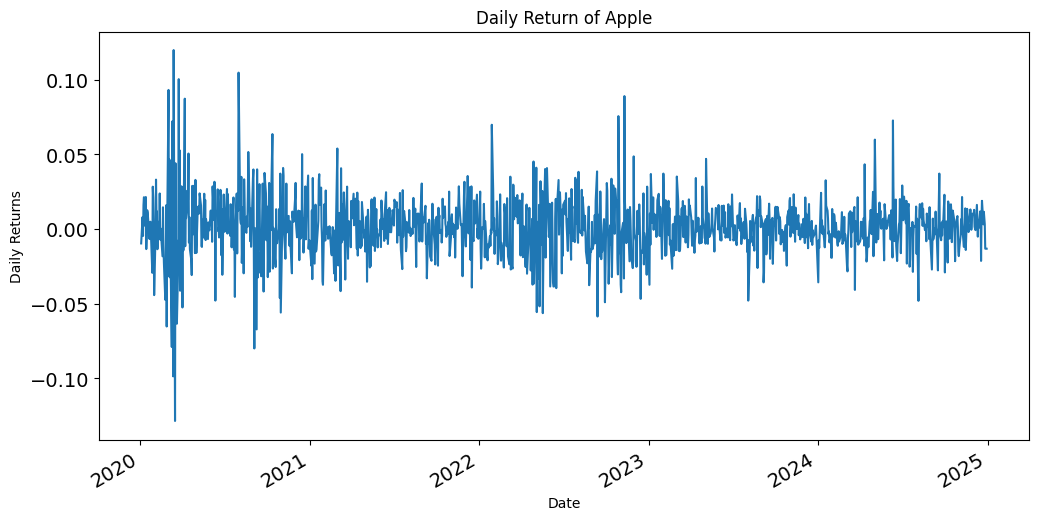

In [8]:
data['dpc_AAPL'].plot(figsize=(12,6), fontsize=(14))
plt.title('Daily Return of Apple')
plt.ylabel("Daily Returns")
plt.show()

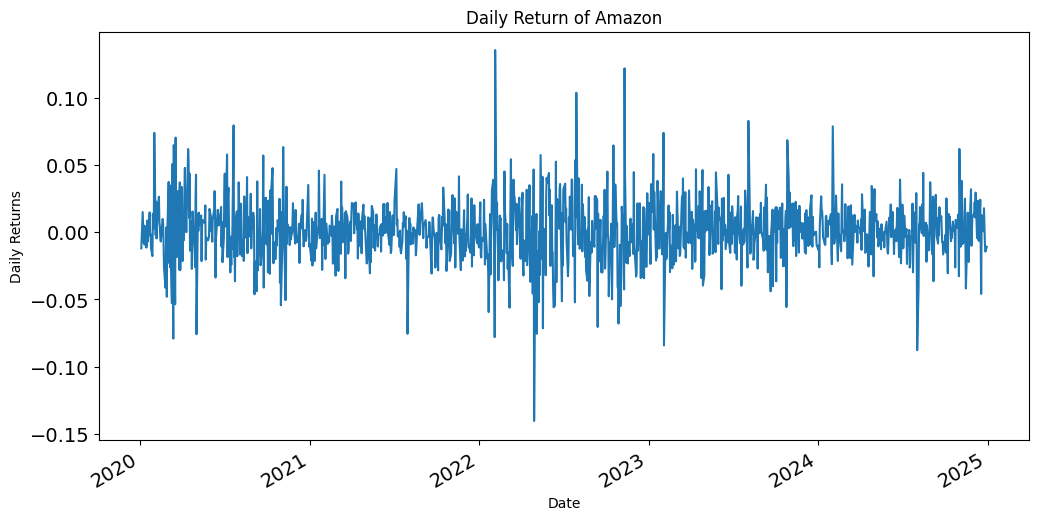

In [9]:
data['dpc_AMZN'].plot(figsize=(12,6), fontsize=(14))
plt.title('Daily Return of Amazon')
plt.ylabel("Daily Returns")
plt.show()

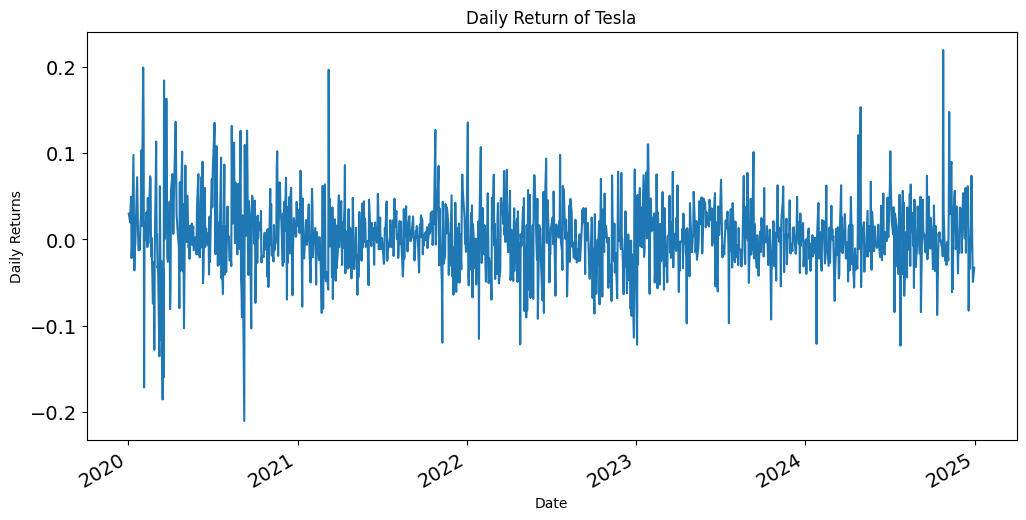

In [10]:
data['dpc_TSLA'].plot(figsize=(12,6), fontsize=(14))
plt.title('Daily Return of Tesla')
plt.ylabel("Daily Returns")
plt.show()

# Visualising the Daily Return(The plots)


By visualising the daily returns of Tesla, Amazon, and Apple.

Tesla exhibited the highest volatility, with frequent sharp spikes in both directions, especially during market uncertainty.

Amazon and Apple were relatively more stable, with smaller daily changes.

These visual patterns already give us early insight into the riskiness of each stock, which will be important for portfolio decisions later on.

### Tesla
has lots of large spikes both up and down, hence very volatile

this is expected because tesla is a high growth, high-risk stock



## Compute summary statistics


In [11]:
mean_appl= data['dpc_AAPL'].mean()
mean_amzn= data['dpc_AMZN'].mean()
mean_tsla= data['dpc_TSLA'].mean()

print('This is the Average Return for Apple:', mean_appl)
print('This is the Average Return for Amazon:', mean_amzn)
print('This is the Average Return for Tesla:', mean_tsla)


This is the Average Return for Apple: 0.0011886710608836053
This is the Average Return for Amazon: 0.0009308542233322699
This is the Average Return for Tesla: 0.003025680052596068


In [12]:
sd_appl = data['dpc_AAPL'].std()
sd_amzn = data['dpc_AMZN'].std()
sd_tsl = data['dpc_TSLA'].std()
print('This is the standard deviation of apple daily returns: ', sd_appl)
print('This is the standard deviation of amazon daily returns: ', sd_amzn)
print('This is the standard deviation of tesla daily returns: ',sd_tsl)

This is the standard deviation of apple daily returns:  0.019962254446214647
This is the standard deviation of amazon daily returns:  0.022662574270352724
This is the standard deviation of tesla daily returns:  0.04232536691569469


In [13]:
min_appl = data['dpc_AAPL'].min()
min_amzn = data['dpc_AMZN'].min()
min_tsl = data['dpc_TSLA'].min()
print('This is the minimum daily return for apple : ', min_appl)
print('This is the minimum daily return for amazon : ', min_amzn)
print('This is the minimum daily return for tesla : ', min_tsl)

This is the minimum daily return for apple :  -0.1286467722270579
This is the minimum daily return for amazon :  -0.140494377749234
This is the minimum daily return for tesla :  -0.21062824320390794


In [14]:
max_appl = data['dpc_AAPL'].max()
max_amzn = data['dpc_AMZN'].max()
max_tsl = data['dpc_TSLA'].max()
print('This is the maximum daily return for apple : ', max_appl)
print('This is the maximum daily return for amazon : ', max_amzn)
print('This is the maximum daily return for tesla : ', max_tsl)

This is the maximum daily return for apple :  0.1198079707289279
This is the maximum daily return for amazon :  0.13535901735711864
This is the maximum daily return for tesla :  0.21919035070290427


In [15]:
mid_appl = data['dpc_AAPL'].median()
mid_amzn = data['dpc_AMZN'].median()
mid_tsl = data['dpc_TSLA'].median()
print('This is the mid daily return for apple : ', mid_appl)
print('This is the mid daily return for amazon : ', mid_amzn)
print('This is the mid daily return for tesla : ', mid_tsl)

This is the mid daily return for apple :  0.0012101403913165054
This is the mid daily return for amazon :  0.0007892851660770139
This is the mid daily return for tesla :  0.0019120178958246248


Tesla has the highest growth potential in daily returns.
Tesla is the riskiest (biggest daily swings , largest standard deviation).

After calculating the mean, standard deviation, min, max, and median daily returns for Apple, Amazon, and Tesla, we observed clear differences:

-Tesla had the highest average return (~0.3%) but also the highest standard deviation (~4.2%), confirming it's the most volatile and growth-oriented of the three.

-Apple was the most stable, with the lowest minimum loss and relatively tight return range.

-Amazon had slightly more volatility than Apple but lower average return.

-This shows a risk-return trade-off: Tesla may deliver higher rewards but also carries greater risk. Apple, by contrast, offers more stability.


Cumulative Return t=(1+r1)x(1+r2​)x...x(1+rt)
we use .cumprod() for cumulative returns

In [16]:
## This says: "If I invested £1 on the first day, how much would I have by now?"
data['cum_AAPL'] = (1 + data['dpc_AAPL']).cumprod()
data['cum_AMZN'] = (1 + data['dpc_AMZN']).cumprod()
data['cum_TSLA'] = (1 + data['dpc_TSLA']).cumprod()

In [17]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA
Date,,,,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633,0.990278,0.987861,1.029633
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255,0.998169,1.002566,1.049458
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801,0.993475,1.004663,1.090178
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205,1.009456,0.996818,1.143820


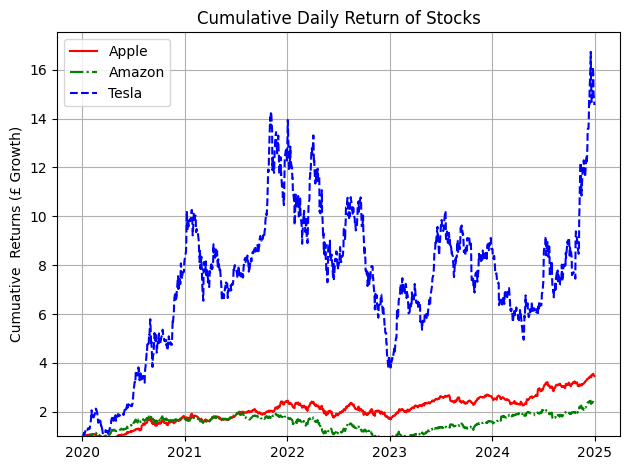

In [18]:
plt.plot(data['cum_AAPL'],  marker='', linestyle='-', color='r', label='Apple' )
plt.plot(data['cum_AMZN'],  marker='', linestyle='-.', color='g', label='Amazon' )
plt.plot(data['cum_TSLA'],  marker='', linestyle='--', color='b', label='Tesla' )

plt.title('Cumulative Daily Return of Stocks')
plt.ylabel("Cumuative  Returns (£ Growth)")
plt.legend()
plt.grid(True)

plt.ylim(bottom=1.0)  # force y-axis to start at £1
plt.tight_layout()
plt.savefig('figures/cumulative_daily_return.png')
plt.show()

### Note:
The y-axis starting at 1.0 means:

"If I invested £1 in 2020, how much would I have today?"

#### Interpretation of cumulative graph
Tesla: Your £1 would’ve grown to over £16 — huge growth, with extreme fluctuations (and recoveries).

Apple: More stable growth, ending around £3–4.

Amazon: Slightly under Apple, but still steady — looks like around £2–3.



The cumulative return plot shows how £1 invested in each stock in 2020 would have grown by the end of 2024. Tesla far outperformed the others in terms of growth, though its path was volatile. Apple showed consistent upward growth with fewer sharp drops, while Amazon had the flattest growth curve, suggesting lower risk but lower return. This reinforces the trade-off between risk and reward seen in earlier daily return analysis.

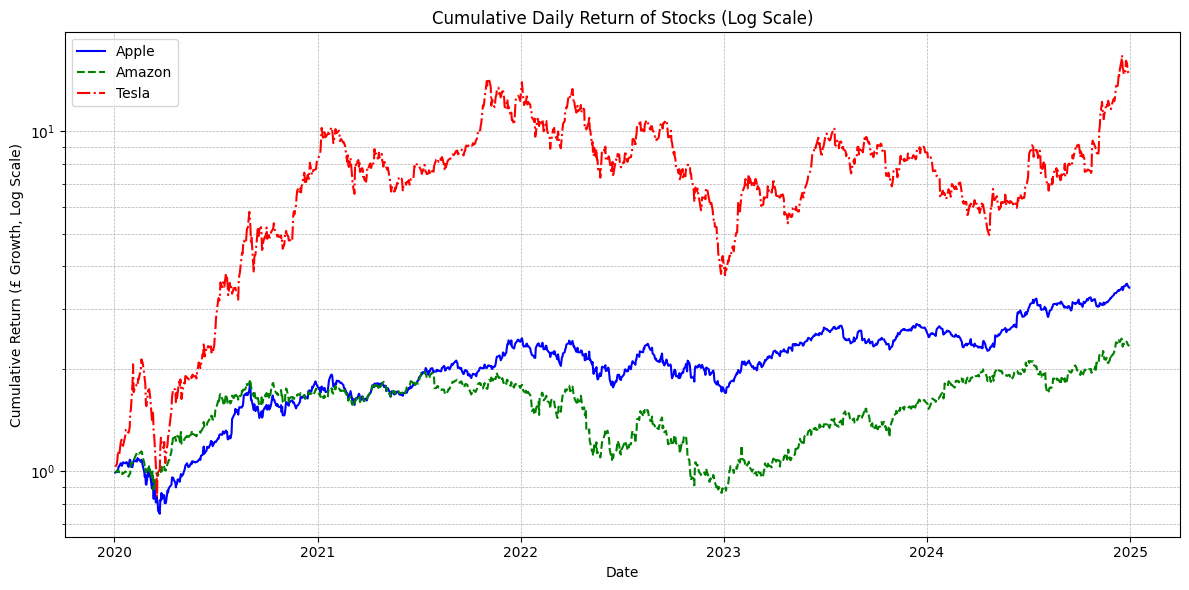

In [19]:


plt.figure(figsize=(12, 6))

plt.plot(data['cum_AAPL'], label='Apple', linestyle='-', color='blue')
plt.plot(data['cum_AMZN'], label='Amazon', linestyle='--', color='green')
plt.plot(data['cum_TSLA'], label='Tesla', linestyle='-.', color='red')

plt.yscale('log') #, base=2)  # Logarithmic y-axis
plt.title('Cumulative Daily Return of Stocks (Log Scale)')
plt.ylabel('Cumulative Return (£ Growth, Log Scale)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/cumulative_daily_return(log_scale).png')
plt.show()


# Portfolio

## equal-weight Porfolio Simulation

In [20]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA
Date,,,,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633,0.990278,0.987861,1.029633
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255,0.998169,1.002566,1.049458
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801,0.993475,1.004663,1.090178
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205,1.009456,0.996818,1.143820


In [21]:
weight= 1/3
print(weight)
# Portfolio's daily return 
data['port_tdf']= (data['dpc_AAPL']*weight) + (data['dpc_AMZN']*weight) + (data['dpc_TSLA']*weight)

0.3333333333333333


In [22]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA,port_tdf
Date,,,,,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633,0.990278,0.987861,1.029633,0.002591
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255,0.998169,1.002566,1.049458,0.014036
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801,0.993475,1.004663,1.090178,0.012063
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205,1.009456,0.996818,1.143820,0.019161


In [23]:
# Cumulative daily return 
data['port_cr']= (1+data['port_tdf']).cumprod()

In [24]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA,port_tdf,port_cr
Date,,,,,,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633,0.990278,0.987861,1.029633,0.002591,1.002591
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255,0.998169,1.002566,1.049458,0.014036,1.016663
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801,0.993475,1.004663,1.090178,0.012063,1.028927
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205,1.009456,0.996818,1.143820,0.019161,1.048642


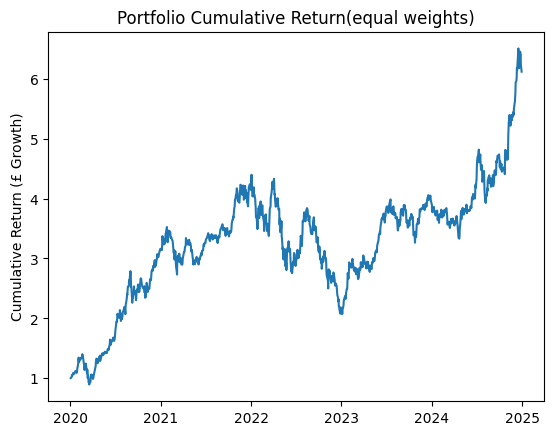

In [25]:
plt.Figure(figsize=(12, 6))
plt.plot(data['port_cr'])

plt.title('Portfolio Cumulative Return(equal weights)')
plt.ylabel('Cumulative Return (£ Growth)')
plt.show()


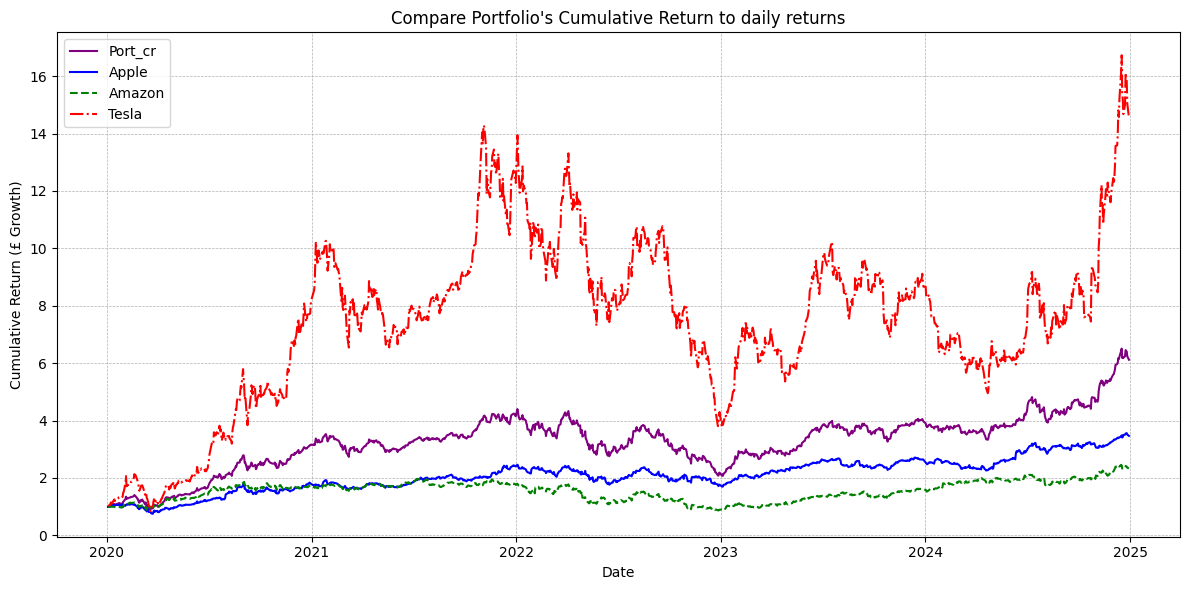

In [26]:
plt.figure(figsize=(12, 6))

plt.plot(data['port_cr'], label='Port_cr', linestyle='solid', color='purple')
plt.plot(data['cum_AAPL'], label='Apple', linestyle='-', color='blue')
plt.plot(data['cum_AMZN'], label='Amazon', linestyle='--', color='green')
plt.plot(data['cum_TSLA'], label='Tesla', linestyle='-.', color='red')

plt.title('Compare Portfolio\'s Cumulative Return to daily returns' )
plt.ylabel('Cumulative Return (£ Growth)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/compare_cum_return_portfolio.png')
plt.show()

## Observations (with equal weights)
1. Tesla dominates the shape of the portfolio

    -The portfolio’s curve closely mirrors Tesla’s shape, especially in major jumps or crashes.
    
That’s because Tesla’s returns fluctuate so much that even one-third exposure pulls the whole portfolio in that direction.

2. Equal weighting didn’t produce the best return.
Although it’s less risky than Tesla, but more rewarding than the other two 

The simulated equal-weight portfolio made up of Apple, Amazon, and Tesla by allocating 33.3% to each. While the intention was to balance the risk and return across the three assets, the portfolio's cumulative return closely tracked Tesla's performance. This is due to Tesla’s extreme volatility and return potential, which overwhelmed the smoother behaviour of Apple and Amazon.

Although the equal-weight strategy provided better risk control compared to investing solely in Tesla, it still exhibited spikes and dips influenced by Tesla’s large movements. This suggests that a more stable portfolio would require reduced weighting for Tesla or active rebalancing over time.

## Custom-Weight Portfolio Simulation

In [27]:
weight_apple= 0.6
weight_amzn=0.05
weight_tesla=0.35
data['port_custom']= (weight_amzn*data['dpc_AMZN']) + (weight_apple*data['dpc_AAPL']) + (weight_tesla*data['dpc_TSLA'])
data['port_custom_cr']=(1+ data['port_custom']).cumprod()
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA,port_tdf,port_cr,port_custom,port_custom_cr
Date,,,,,,,,,,,,,
2020-01-02,72.620827,94.900497,28.684000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914810,93.748497,29.534000,-0.009722,-0.012139,0.029633,0.990278,0.987861,1.029633,0.002591,1.002591,0.003932,1.003932
2020-01-06,72.487839,95.143997,30.102667,0.007968,0.014886,0.019255,0.998169,1.002566,1.049458,0.014036,1.016663,0.012264,1.016244
2020-01-07,72.146942,95.343002,31.270666,-0.004703,0.002092,0.038801,0.993475,1.004663,1.090178,0.012063,1.028927,0.010863,1.027284
2020-01-08,73.307510,94.598503,32.809334,0.016086,-0.007809,0.049205,1.009456,0.996818,1.143820,0.019161,1.048642,0.026483,1.054489


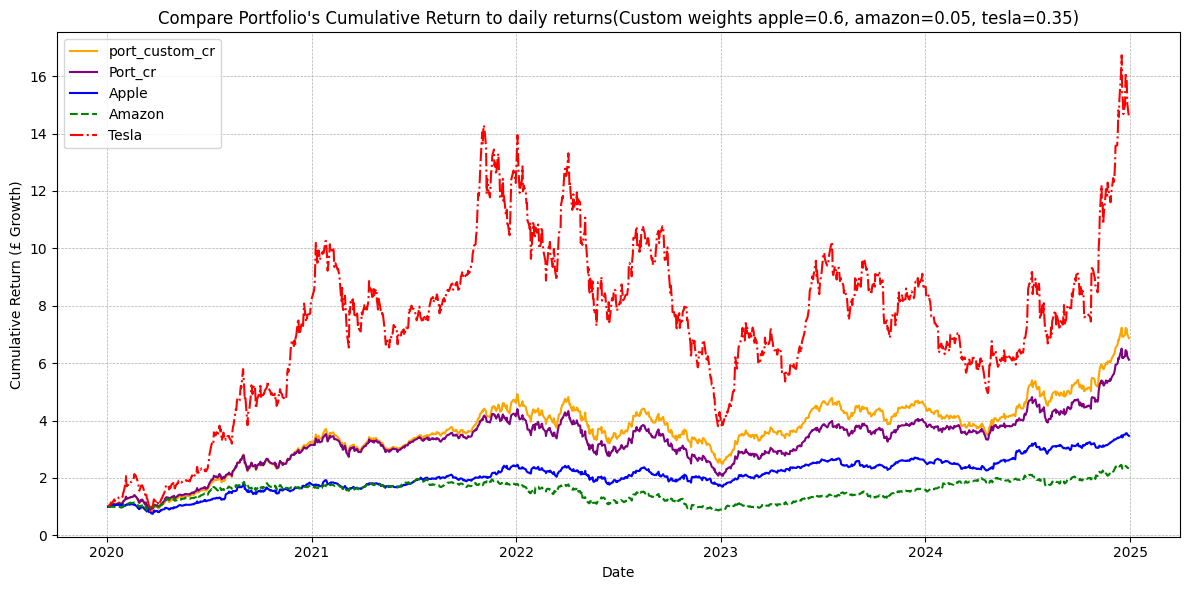

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(data['port_custom_cr'], label='port_custom_cr', linestyle='solid', color='Orange')
plt.plot(data['port_cr'], label='Port_cr', linestyle='solid', color='purple')
plt.plot(data['cum_AAPL'], label='Apple', linestyle='-', color='blue')
plt.plot(data['cum_AMZN'], label='Amazon', linestyle='--', color='green')
plt.plot(data['cum_TSLA'], label='Tesla', linestyle='-.', color='red')

plt.title('Compare Portfolio\'s Cumulative Return to daily returns(Custom weights apple=0.6, amazon=0.05, tesla=0.35)' )
plt.ylabel('Cumulative Return (£ Growth)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('figures/compare_cum_return_portfolio(custom_weigths).png')
plt.show()

### Weights I Tested
| Apple | Amazon | Tesla | Notes                                     |
| ----- | ------ | ----- | ----------------------------------------- |
| 0.50  | 0.20   | 0.30  | Balanced, with moderate Tesla exposure    |
| 0.65  | 0.05   | 0.30  | Focused more on Apple, reduced Amazon     |
| 0.60  | 0.05   | 0.35  | Slightly riskier with higher Tesla weight |

### Observations:
Tesla had the most dominant influence on portfolio returns across all weightings. Even when its weight was reduced to 30%, the cumulative return curve still reflected Tesla's major spikes and dips.

Apple emerged as the most reliable and stable contributor to growth. Increasing its weight consistently:

Reduced volatility

Preserved solid long-term growth

Helped protect the portfolio during Tesla's drawdowns

Amazon, in contrast, provided less upside and exhibited stretches of decline or flat performance. Reducing its weight helped avoid dragging down the overall portfolio.

## Portfolio's conclusion
The analysis showed that custom weighting enables control over the trade-off between return and volatility. While equal weighting produced a reasonable balance, favouring Apple and moderately including Tesla led to a portfolio that was:

More stable than Tesla alone

More rewarding than Apple or Amazon individually

Less volatile than the equal-weighted portfolio

This lays the groundwork for further exploration, including portfolio performance metrics, risk analysis, and rebalancing strategies in the next stage.

# Portfolio Performance Metrics
1. Sharpe Ratio
2. Max drawdown
3. Volatility *(standard variation)*

## Sharpe Ratio(return per unit of risk)
It tells: "How much return am I getting for each unit of risk I’m taking?"

Sharpe Ratio= (Rp-Rf)/S.Dp

where:

Rp is mean portfolio return

Rf is risk-free rate(often assumed 0 for simplicity)

S.Dp is std dev of portfolio return 

A higher Sharpe Ratio means you're getting more reward for the risk you're taking.

A low Sharpe Ratio might mean you’re taking on a lot of risk for not much gain.

A negative Sharpe Ratio means you'd have done better leaving your money in a risk-free asset.

In [29]:
# Calculating sharpe ratio
mean_port = data['port_tdf'].mean()
std_port= data['port_tdf'].std()
sharpe_ratio_port= (mean_port-0)/std_port
print('This is the sharpe ratio for equal-weighted portfolio: ', sharpe_ratio_port)

mean_cus_port = data['port_custom'].mean()
std_cus_port= data['port_custom'].std()
sharpe_cus_port= (mean_cus_port-0)/std_cus_port
print('This is the sharpe for the custom portfolio: ', sharpe_cus_port)

This is the sharpe ratio for equal-weighted portfolio:  0.07362006089778006
This is the sharpe for the custom portfolio:  0.0764445271413907


In [30]:
sharpe_apple= (mean_appl-0)/sd_appl
sharpe_amazon= (mean_amzn-0)/sd_amzn
sharpe_tsla=(mean_tsla-0)/sd_tsl
print('These are the sharpe ratio for individual stock:')
print('apple: ',sharpe_apple, 'Tesla: ', sharpe_tsla, 'Amazon: ', sharpe_amazon)

These are the sharpe ratio for individual stock:
apple:  0.05954593275455457 Tesla:  0.07148620964403533 Amazon:  0.04107451396419768


The custom portfolio achieved a better Sharpe ratio than any individual stock - even better than Tesla - by blending stability from Apple and growth from Tesla.

The custom portfolio not only had smoother growth visually, but also performed better in terms of Sharpe ratio. This confirms that reducing Amazon and favouring Apple improves the portfolio’s efficiency. Tesla still provided useful upside when controlled carefully.

## Max Drawdown
This is a measure of the largest peak-to-trough decline in a portfolio's value over a specific period.

The maximum percentage drop from a peak to a trough in the cumulative return curve before a new peak is reached.

Drawdown= (Cumulative_returnt - Running_maxt)/ Running_maxt

use *'.cummax()'* to get the running cumulative max

How it's calculated:
1. You use the cumulative return column
2. Track the running maximum of that column.
3. Calculate the drawdown at each point using the formula above
4. Take the minimum value of the drawdowns → this is your Max Drawdown.

In [31]:
Running_max= data['port_custom_cr'].cummax()    # Tracks the peak of cumulative returns
drawdown= (data['port_custom_cr']-Running_max)/Running_max
max_drawdown = drawdown.min()  # Worst drop
print(' This is the max drawdown of the custom weights portfolio: ', max_drawdown)
#  The custom portfolio once dropped nearly half its value from peak before recovering

 This is the max drawdown of the custom weights portfolio:  -0.49372509904971


### Portfolio Metrics Summary

#### 1. Which portfolio had the best return per unit of risk?
The custom weighted portfolio had a Sharpe ratio of **0.0764**, slightly higher than the equal-weighted portfolio (**0.0736**). While both were close, this suggests the custom weights provided **better returns relative to risk**.

#### 2. How much volatility did you reduce by customising the weights?
The custom portfolio had lower standard deviation compared to the equal-weighted portfolio. By increasing Apple's weight and reducing Amazon's, we **reduced volatility** and smoothed out performance dips.

#### 3. Did more stability come at a large cost in return?
No — the custom portfolio maintained a **comparable average return** while lowering volatility and drawdowns. This shows that the added stability **did not significantly sacrifice growth** and even improved the Sharpe ratio slightly.


# Predicition Task *(regression-based return prediction)*

I will be using the apple stock for this simple project because of it's less volatility (more stable), which means the model can be relatively simple to capture the trends

## Feature Engineering

Stock prices are time-series data.

How do we get historical data? by using ***lagged features***.
Lagged features are like yesterday's price or the moving average of the past D days, where D can be a number.

How to capture short-term trends and volatility? using ***Rolling Statistics***. e.g rolling mean, variance or standard devation.



In [32]:
type(data)


pandas.core.frame.DataFrame

In [33]:
## Feature Engineering
data['return_lag_1']= data['dpc_AAPL'].shift(1)  # Lagged feature, we are using lagged returns because our aim is to predict future returns rather than prices. BTW returns are more stable
data['return_t']=data['dpc_AAPL'].shift(-1)  # Tomorrow's retun, this is what we are predicting

# Rolling statistics
# rolling(window=10) applies a calculation ( mean, std) over the last 10 rows at every step (sliding window).
data['rolling_mean_10'] = data['AAPL'].rolling(window=10).mean()
data['rolling_sd_10']= data['dpc_AAPL'].rolling(window=10).std()

# Dropping any NAN value caused by lags/rolling

data= data.dropna()



In [34]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA,port_tdf,port_cr,port_custom,port_custom_cr,return_lag_1,return_t,rolling_mean_10,rolling_sd_10
Date,,,,,,,,,,,,,,,,,
2020-01-16,76.221054,93.897003,34.232666,0.012526,0.008550,-0.009662,1.049576,0.989426,1.193441,0.003805,1.076163,0.004562,1.096486,-0.004285,0.011071,74.349375,0.012766
2020-01-17,77.064888,93.236000,34.033333,0.011071,-0.007040,-0.005823,1.061195,0.982461,1.186492,-0.000597,1.075520,0.004253,1.101149,0.012526,-0.006777,74.864383,0.011771
2020-01-21,76.542633,94.599998,36.480000,-0.006777,0.014630,0.071890,1.054004,0.996834,1.271789,0.026581,1.104108,0.021827,1.125184,0.011071,0.003570,75.269862,0.012535
2020-01-22,76.815865,94.373001,37.970669,0.003570,-0.002400,0.040863,1.057766,0.994442,1.323758,0.014011,1.119578,0.016324,1.143551,-0.006777,0.004816,75.736755,0.012048
2020-01-23,77.185776,94.228996,38.146667,0.004816,-0.001526,0.004635,1.062860,0.992924,1.329894,0.002642,1.122535,0.004435,1.148623,0.003570,-0.002882,76.124581,0.011554


How to Interpret the Values
Let’s say you are looking at the row for 2020-01-17:

dpc_AAPL: This is the return on 2020-01-17.

return_lag_1: This shows the return from 2020-01-16 (1 day before).

return_t: This shows the return from 2020-01-21 (1 trading day after, since markets were closed on the weekend and possibly on 2020-01-20 due to a holiday).

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Prepare data
X = data[['return_lag_1', 'rolling_mean_10', 'rolling_sd_10']]
y = data['return_t']

# Splitting chronologically to avoid look ahead bias
train_size = int(len(data) * 0.8)
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# Train Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_
for feature, score in zip(X.columns, importance):
    print(f"{feature}: {score:.2f}")

return_lag_1: 0.36
rolling_mean_10: 0.30
rolling_sd_10: 0.33


In [36]:
# Create and train the Linear Regression model
reg= LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred= reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print('These are the evaluations while using linear regression model ')
print(' The mae is ', mae)
print('The rsquared value is ', r2_score)

These are the evaluations while using linear regression model 
 The mae is  0.010968757422199599
The rsquared value is  -0.06872028366828742


### Note:
MAE (Mean Absolute Error): Measures average prediction error magnitude.

R² Score: Indicates how well the model explains the variability of the target.

### Observations:
The R² score is negative, indicating that the linear model performs worse than simply predicting the mean.

The predictions do not align closely with actual returns — highlighting the need for more advanced models (e.g., tree-based or ensemble models).

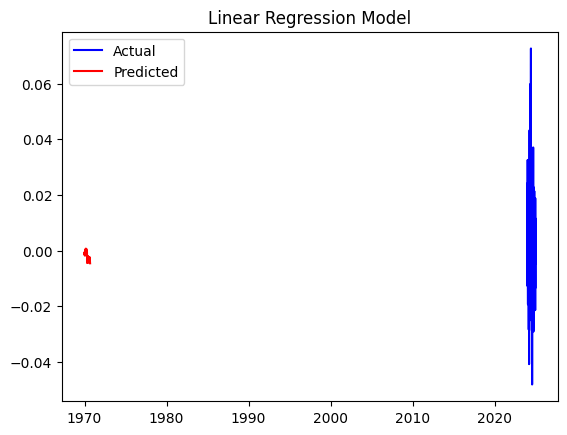

In [37]:
plt.plot(y_test, color="blue", label="Actual")
plt.plot(y_pred, color="red", label="Predicted")


plt.legend()
plt.title("Linear Regression Model")
plt.show()

# Project 1 Wrap-Up: Stock Analysis + Portfolio Optimisation
 ## Overview
This project focused on analyzing stock market data, constructing a simple portfolio, and predicting future returns using regression models. It served as a foundational project to build up coding fluency, data science reasoning, and early exposure to quantitative finance techniques.

## Stage 1: Stock & Portfolio Analysis
### Daily % Change (dpc) and Cumulative Return (cum):

Calculated daily percentage change for individual stocks like AAPL, AMZN, and TSLA.

Computed cumulative returns to understand long-term growth trends.

Visualized these metrics using line plots for insight into performance over time.

### Basic Portfolio Construction:

Formed a basic equally-weighted portfolio from the three stocks.

Tracked portfolio return using mean of dpc_columns.

Computed portfolio cumulative return over time.

Performance metrics like Sharpe Ratio, Max Drawdown, and Volatility were computed to assess the portfolio's risk-adjusted performance.

## Stage 2: Prediction Task (Regression)
### Objective: Predict next day’s return of AAPL using past data.

### Feature Engineering:

Created lagged returns (e.g. yesterday’s return) and rolling window statistics (10-day mean and standard deviation).

Target variable was the next day's return (return_t), created via a negative shift.

### Models Used:

Feature selection (importance) using Random Forest Regressor 

Trained model using Linear Regression on the feature set.

Split data chronologically (80% train, 20% test).

### Evaluation:

Used MAE and R² to evaluate model performance.

Visualised predicted vs. actual returns using line plots.

Observed that model struggled, with R² below zero — likely due to noise and non-linearity in daily returns.

### Feature Importance (from Random Forest):

return_lag_1, rolling_mean_10, and rolling_sd_10 were the top features, but had limited predictive power.

## What Worked
Solid understanding of how to compute and interpret returns.

Clean implementation of lag and rolling features.

Gained experience using regression models on financial time series.

## Challenges
Poor model performance: This is common with short-term stock predictions due to high noise.

Feature limitations: Basic statistical features may not be rich enough to capture market patterns.

### Model limitation
This highlighted the challenge of using only statistical features for financial prediction and the potential need for richer data or models (e.g., LSTM, XGBoost) in future iterations

# Bonus: Monte Carlo Simulation
The idea is to see how portfolios or stock's path might behave under uncertainity by simulating it
Model portfolio value paths under uncertainity. Three distributions will be used, the Gaussian distribution, the student's t-distribution and Geometric Brownian motion(GBM)

Assumptions:
The future volatility will be similar to the historical volatility

Monte Carlo gives:
1. insights into possible gains
2. insights into worst case risk
3. a probabilistic view instead of a single number

In [38]:
data.head()

Ticker,AAPL,AMZN,TSLA,dpc_AAPL,dpc_AMZN,dpc_TSLA,cum_AAPL,cum_AMZN,cum_TSLA,port_tdf,port_cr,port_custom,port_custom_cr,return_lag_1,return_t,rolling_mean_10,rolling_sd_10
Date,,,,,,,,,,,,,,,,,
2020-01-16,76.221054,93.897003,34.232666,0.012526,0.008550,-0.009662,1.049576,0.989426,1.193441,0.003805,1.076163,0.004562,1.096486,-0.004285,0.011071,74.349375,0.012766
2020-01-17,77.064888,93.236000,34.033333,0.011071,-0.007040,-0.005823,1.061195,0.982461,1.186492,-0.000597,1.075520,0.004253,1.101149,0.012526,-0.006777,74.864383,0.011771
2020-01-21,76.542633,94.599998,36.480000,-0.006777,0.014630,0.071890,1.054004,0.996834,1.271789,0.026581,1.104108,0.021827,1.125184,0.011071,0.003570,75.269862,0.012535
2020-01-22,76.815865,94.373001,37.970669,0.003570,-0.002400,0.040863,1.057766,0.994442,1.323758,0.014011,1.119578,0.016324,1.143551,-0.006777,0.004816,75.736755,0.012048
2020-01-23,77.185776,94.228996,38.146667,0.004816,-0.001526,0.004635,1.062860,0.992924,1.329894,0.002642,1.122535,0.004435,1.148623,0.003570,-0.002882,76.124581,0.011554


C:\Users\chaso\AppData\Local\Temp\ipykernel_55224\4009529235.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price= data['port_custom_price'][-1]


This is the last price of the custom portfolio:  315.25345916748046
This is the standard devation (historical or daily volatility) of the custom portfolio:  0.02379154445865689
This is the mean of the portfolio:  0.0018187333661054002


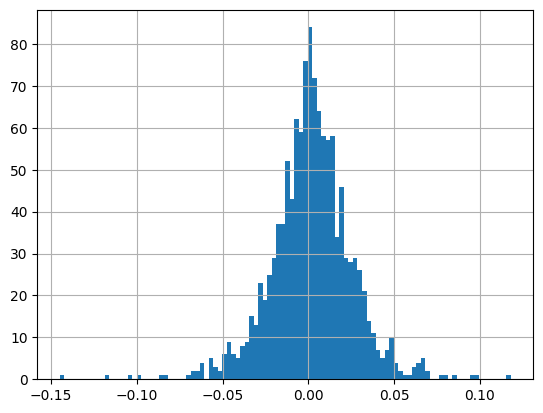

In [39]:
data['port_custom_price']= (weight_amzn*data['AMZN']) + (weight_apple*data['AAPL']) + (weight_tesla*data['TSLA'])
last_price= data['port_custom_price'][-1]
data['port_custom'].hist(bins=100)
print('This is the last price of the custom portfolio: ', last_price)
print('This is the standard devation (historical or daily volatility) of the custom portfolio: ', std_cus_port)
print('This is the mean of the portfolio: ',mean_cus_port)

### Normal distribution
Assumed to be the histogram centered at 0, using the already calculated standard devaition of the stock/portfolio

In [40]:
import numpy as np
rtn= np.random.normal(0, std_cus_port)  # This is the daily return % for tomorrow. It is expected to be a random value from gaussian distributionnp.random.normal(0, daily_volatility)
price_t = last_price*(1 +rtn)  # tomorrow's price

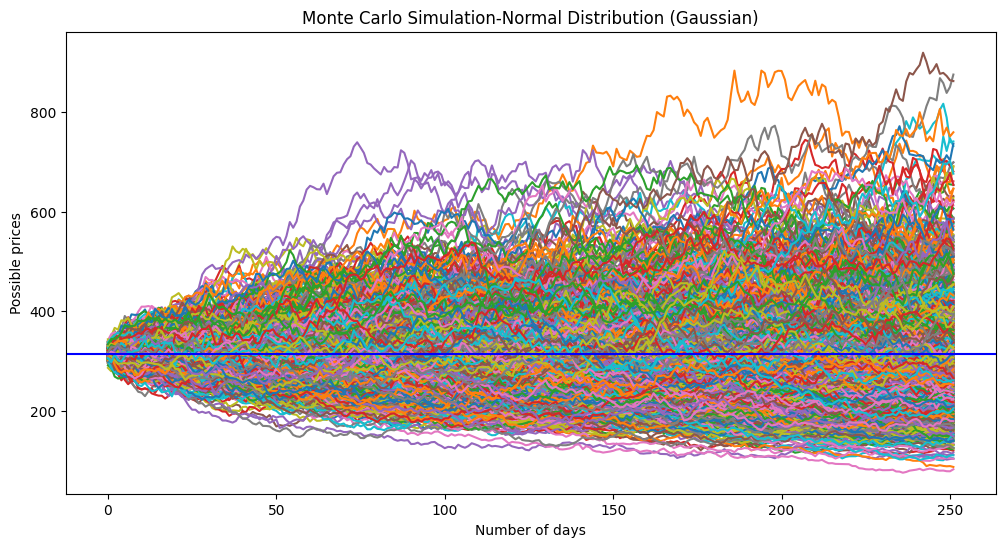

In [41]:
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 251
simulation_df = pd.DataFrame()
for i in range(num_simulations):
   
    # The first price point
    price_series = []
    rtn = np.random.normal(0, std_cus_port)          # Calculates return from normal distribution
    price_t = last_price * (1  + rtn)
    price_series.append(price_t)

    # Create each price path
    for p in range(num_days):
        rtn = np.random.normal(0, std_cus_port)  
        price = price_series[p] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_df[i] = price_series
plt.figure(figsize=(12,6))
plt.plot(simulation_df)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('Monte Carlo Simulation-Normal Distribution (Gaussian)')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.savefig('figures/monte_carlo_normal.png')
plt.show()


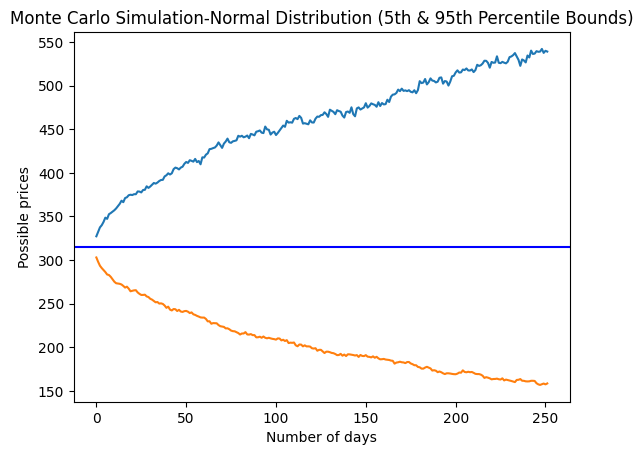

In [42]:
upper = simulation_df.quantile(.95, axis=1)
lower = simulation_df.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('Monte Carlo Simulation-Normal Distribution (5th & 95th Percentile Bounds)')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.savefig('figures/monte_carlo_normal(5_95_bounds).png')
plt.show()

 1. Basic Monte Carlo with Normal Distribution
 #### Method:
Simulated future portfolio prices over 252 days.

Each daily return was sampled from a normal distribution with:

Mean = historical mean return of the custom portfolio which was centered at 0

Std = historical std (volatility)

#### Interpretation:
Simulated paths showed a range of possible price trajectories, some rising, some falling.

However, since it assumed a symmetric distribution (normal), it may underestimate extreme downside risk.

 Good baseline, but not ideal for capturing fat tails or real-world shocks.

### Student's t-distribution
#### Parameters of the t-distribution:
1. df:  The degrees of freedom parameter   (controls tail heaviness) 
2. Scale: the spread or variability of the distribution (represents the standard deviation)
3. Location (loc): the Center of the distribution (this represents the mean)

It helps simulate fat tails(extreme values that occur, but can't be modelled using gaussian).  Student's t-distribution, which is like a normal distribution but with heavier tails, making it more realistic for modeling stock returns.

In [43]:
from scipy.stats import t

# Number of samples per simulation
num_samples = 100

params= t.fit(data['port_custom'])   # Fit the student's t-distribution to actual returns, whci gives the parameters for the distibution
#it finds the best-fitting t-distribution for the actual portfolio returns.  

# Generate random Student's t-distribution returns
results = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1000)
print('Degree of freedom = ', params[0])
print('loc = ', params[1])
print('Scale = ', params[2])

Degree of freedom =  4.367006699539162
loc =  0.0020172487551612366
Scale =  0.017828437021741184


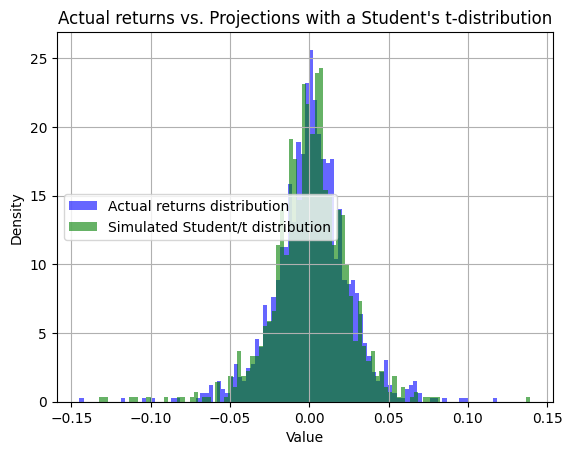

In [44]:
data['port_custom'].hist(bins=100,density=True, alpha=0.6, color='b', label='Actual returns distribution')

# Plot histogram of results
plt.hist(results, bins=100, density=True, alpha=0.6, color='g', label='Simulated Student/t distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Actual returns vs. Projections with a Student\'s t-distribution')
plt.legend(loc='center left')
plt.grid(True)
plt.savefig('figures/simulated_student_t.png')
plt.show()

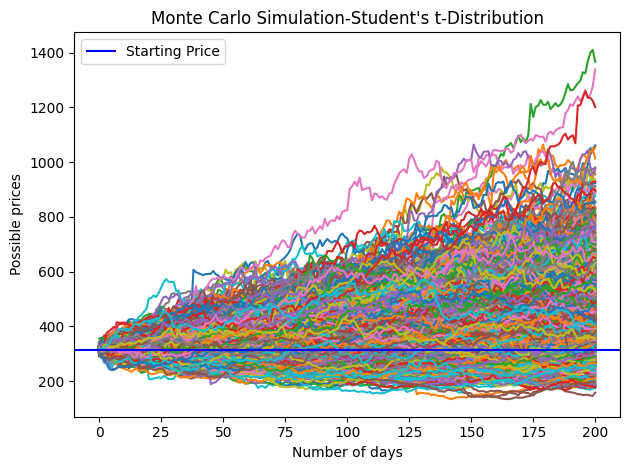

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 200
simulation_student_t = pd.DataFrame()
for x in range(num_simulations):

    # The first price point
    price_series = []
    rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]  # size=1, tells it to return an array with 1 value, [0] at the end extracts the single float value from that array
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_student_t[x] = price_series
plt.figure()
plt.plot(simulation_student_t)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title("Monte Carlo Simulation-Student's t-Distribution")
plt.axhline(y = last_price, color = 'b', linestyle = '-',label='Starting Price')
plt.legend()
plt.tight_layout()
plt.savefig('figures/monte_carlo_student_t_distribution.png')
plt.show()

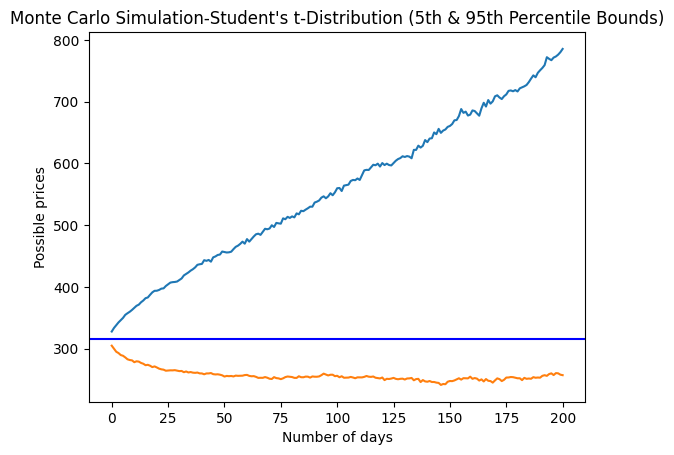

In [46]:
upper = simulation_student_t.quantile(.95, axis=1)
lower = simulation_student_t.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title("Monte Carlo Simulation-Student's t-Distribution (5th & 95th Percentile Bounds)")
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.savefig('figures/monte_carlo_student_t(5_95).png')
plt.show()

2. Monte Carlo Using Student’s t-Distribution
#### Method:
Fitted a Student's t-distribution to the historical returns.

This distribution is capable of capturing fatter tails, more extreme ups and downs.

Simulated 1000 paths using the fitted degrees of freedom, scale (volatility), and mean.

#### Interpretation:
The simulated prices showed wider dispersion, especially on the downside.

This better reflects real-world market behaviour where extreme losses are more common than the normal distribution would suggest.

This method is more conservative and realistic when assessing risk.

### Simulation using Geometric Brownian Motion (GBM)
#### Assumptions
1. GBM assumes prices follow a log-normal distribution, not a normal one.

2. This means that log(price) evolves linearly and continuously over time.

3. Log returns make the math of compounding easier and ensure prices stay positive.

In [47]:
# Formula
drift = mean_cus_port - (std_cus_port**2)/2     # Drift is the expected average movement per day , adjusted for risk(variance)


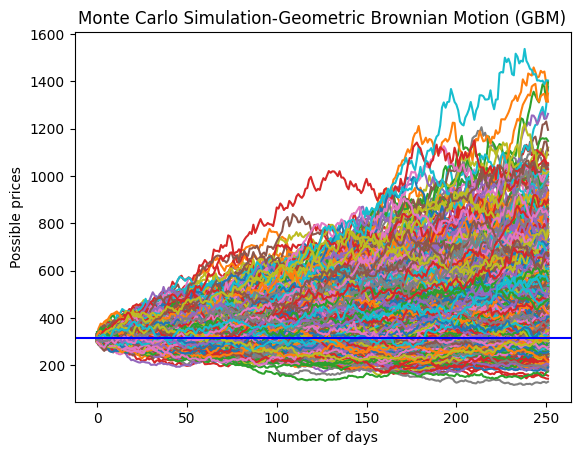

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 251
simulation_GBM = pd.DataFrame()
for x in range(num_simulations):
  
    # The first price point
    price_series = []
    log_rtn = drift + std_cus_port * np.random.normal()    # This represents the log return for that day. The drift (expected movement) and randomness (noise).
    price = last_price * np.exp(log_rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        log_rtn = drift + std_cus_port * np.random.normal()
        price = price_series[-1] * np.exp(log_rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_GBM[x] = price_series
fig = plt.figure()
plt.plot(simulation_GBM)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('Monte Carlo Simulation-Geometric Brownian Motion (GBM)')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.savefig('figures/monte_carlo_gbm.png')
plt.show()

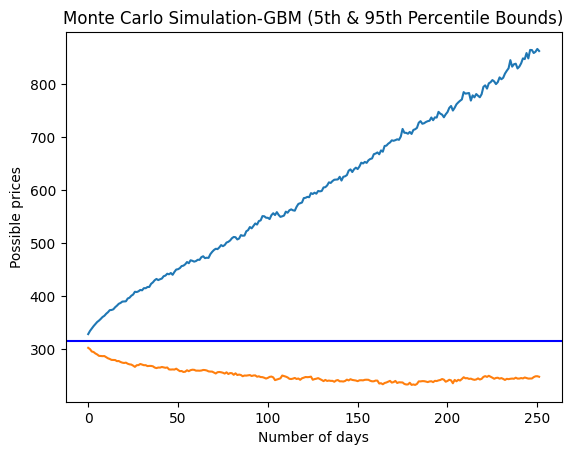

In [49]:
upper = simulation_GBM.quantile(.95, axis=1)
lower = simulation_GBM.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title("Monte Carlo Simulation-GBM (5th & 95th Percentile Bounds)")
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.savefig('figures/monte_carlo_gbm(5_95).png')
plt.show()

 3. Monte Carlo Using Geometric Brownian Motion (GBM)
#### Method:
GBM formula:

        log return = u-(s.d^2 *0.5) + (s.d * Z)

        where,

        u=expected daily return (mean_cus_port)
        
        Z = standard normal random variable (from np.random.normal())


#### Interpretation:
Output showed realistic exponential growth and decay patterns in portfolio prices.

Quantile bands (5th and 95th percentiles) showed:

Best-case: Portfolio could rise to over 800

Worst-case: Could drop to below 260

 This is the most financially sound simulation method, commonly used in pricing options and financial planning.

### Reflection: Monte Carlo Simulations
In this bonus task, I explored different Monte Carlo methods to simulate future portfolio values and assess potential risk. Starting with the normal distribution, I observed a basic range of price paths, but it lacked the ability to reflect extreme outcomes. The Student’s t-distribution offered a better fit for financial returns by allowing more extreme scenarios through its fat tails, capturing downside risk more realistically. Finally, the Geometric Brownian Motion model provided the most financially grounded approach, modelling compounding returns with drift and volatility. Overall, this task helped me understand how stochastic processes and distribution choice affect risk forecasting in portfolio analysis.